## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

## Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


## Loading and preprocessing data

In [ ]:
with open('gdrive/Shareddrives/BMP/data/usable_data', 'r') as fout:
    usable_data = json.load(fout)

In [ ]:
usable_data[0].keys()

dict_keys(['gas', 'elastic', 'ionization', 'excitation', 'swarm'])

In [ ]:
df = pd.json_normalize(usable_data)

In [ ]:
df.drop(['elastic.gas', 'ionization.gas', 'excitation.gas'], axis=1, inplace = True)

In [ ]:
df_ip = pd.DataFrame()
df_ip['elastic.energy'] = df['elastic.energy'][0]
for i in range(45):
    df_ip[i+1] = df['elastic.crosssection'][i]

In [ ]:
df_ip = df_ip.drop(['elastic.energy'],axis=1)
df_ip.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,5.469070e-21,1.044000e-19,1.047316e-19,5.865454e-20,8.605642e-20,7.069127e-21,3.770179e-20,6.150000e-19,5.949384e-20,3.103697e-19,5.200000e-19,3.640587e-19,2.600000e-21,2.000000e-18,7.557134e-20,4.242757e-19,1.227290e-18,1.145823e-20,1.029000e-18,1.391020e-19,1.691718e-19,6.371059e-18,5.890578e-18,4.043521e-19,7.167818e-18,2.680563e-18,1.281502e-17,1.004820e-17,5.257125e-18,1.992190e-17,1.834679e-17,1.855679e-17,1.448665e-17,1.498930e-19,3.275000e-20,2.028253e-20,2.302406e-18,6.380530e-20,3.910000e-19,1.360000e-20,1.309999e-20,6.510000e-20,9.703000e-20,2.084986e-18,4.200000e-20
1,4.765939e-21,1.056813e-19,1.061265e-19,5.890275e-20,7.940299e-20,7.274709e-21,4.174580e-20,5.827244e-19,6.131506e-20,2.902118e-19,4.961654e-19,3.450032e-19,2.142436e-21,1.899763e-18,7.862909e-20,4.768882e-19,1.152631e-18,1.170361e-20,8.001894e-19,1.374996e-19,1.643684e-19,6.242272e-18,5.875634e-18,4.021129e-19,6.689836e-18,2.544696e-18,1.199625e-17,9.385087e-18,4.918134e-18,1.859784e-17,1.723140e-17,1.733587e-17,1.343952e-17,1.552607e-19,3.869555e-20,1.846992e-20,2.127055e-18,5.757871e-20,3.861965e-19,1.394876e-20,1.429365e-20,6.689676e-20,9.370581e-20,2.262116e-18,4.282895e-20
2,4.024491e-21,1.069783e-19,1.075980e-19,5.919749e-20,7.283978e-20,7.488451e-21,4.477947e-20,5.521426e-19,6.320588e-20,2.692945e-19,4.734250e-19,3.269450e-19,1.765394e-21,1.804537e-18,8.175452e-20,5.389002e-19,1.082882e-18,1.196747e-20,6.483273e-19,1.357815e-19,1.602204e-19,6.092679e-18,5.856929e-18,3.998886e-19,6.244183e-18,2.415731e-18,1.137069e-17,8.833821e-18,4.680969e-18,1.736200e-17,1.618388e-17,1.619535e-17,1.246927e-17,1.608206e-19,4.572046e-20,1.682019e-20,1.975409e-18,5.224212e-20,3.814540e-19,1.430680e-20,1.554278e-20,6.874310e-20,9.165915e-20,2.446229e-18,4.367421e-20
3,3.370606e-21,1.082912e-19,1.091112e-19,5.950940e-20,6.666644e-20,7.709223e-21,4.750619e-20,5.231662e-19,6.515997e-20,2.493827e-19,4.517785e-19,3.098321e-19,1.454710e-21,1.714089e-18,8.499169e-20,6.103144e-19,1.016598e-18,1.224094e-20,5.424649e-19,1.339392e-19,1.557804e-19,5.968874e-18,5.836926e-18,3.976686e-19,5.827497e-18,2.293276e-18,1.077786e-17,8.316246e-18,4.455315e-18,1.620759e-17,1.520001e-17,1.512966e-17,1.157160e-17,1.641557e-19,5.222254e-20,1.552070e-20,1.842617e-18,4.713698e-20,3.767734e-19,1.467578e-20,1.678398e-20,7.065617e-20,9.030460e-20,2.645326e-18,4.453622e-20
4,2.821440e-21,1.097604e-19,1.106468e-19,5.982281e-20,6.060037e-20,7.936564e-21,5.039892e-20,4.957107e-19,6.717443e-20,2.309462e-19,4.312092e-19,2.896066e-19,1.368525e-21,1.628174e-18,8.836571e-20,6.958842e-19,9.547330e-19,1.252069e-20,4.655570e-19,1.322472e-19,1.510196e-19,5.860067e-18,5.813885e-18,3.954655e-19,5.438800e-18,2.177060e-18,1.021627e-17,7.829042e-18,4.240302e-18,1.513078e-17,1.427593e-17,1.413409e-17,1.073404e-17,1.661107e-19,5.771736e-20,1.432161e-20,1.706159e-18,4.210114e-20,3.721370e-19,1.505101e-20,1.801136e-20,7.264826e-20,8.993362e-20,2.860628e-18,4.541525e-20


Normalising Dataset and Interpolation

In [ ]:
for column in df_ip.columns:
    df_ip[column] = np.log10(df_ip[column])

In [ ]:
df_ip

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-20.262086,-18.981300,-18.979922,-19.231698,-19.065217,-20.150634,-19.423638,-18.211125,-19.225528,-18.508121,-18.283997,-18.438829,-20.585027,-17.698970,-19.121643,-18.372352,-17.911053,-19.940882,-17.987585,-18.856667,-18.771672,-17.195788,-17.229842,-18.393240,-17.144613,-17.571774,-16.892281,-16.997912,-17.279252,-16.700669,-16.736440,-16.731497,-16.839032,-18.824219,-19.484789,-19.692878,-17.637818,-19.195143,-18.407823,-19.866461,-19.882729,-19.186419,-19.013094,-17.680897,-19.376751
1,-20.321852,-18.976002,-18.974176,-19.229864,-19.100163,-20.138184,-19.379387,-18.234537,-19.212433,-18.537285,-18.304374,-18.462177,-20.669092,-17.721301,-19.104417,-18.321583,-17.938310,-19.931680,-18.096807,-18.861698,-18.784182,-17.204657,-17.230945,-18.395652,-17.174585,-17.594364,-16.920955,-17.027562,-17.308200,-16.730537,-16.763679,-16.761054,-16.871616,-18.808938,-19.412339,-19.733535,-17.672221,-19.239738,-18.413192,-19.855465,-19.844857,-19.174595,-19.028233,-17.645485,-19.368263
2,-20.395289,-18.970704,-18.968196,-19.227697,-19.137631,-20.125608,-19.348921,-18.257949,-19.199243,-18.569773,-18.324749,-18.485525,-20.753158,-17.743634,-19.087488,-18.268492,-17.965419,-19.921997,-18.188206,-18.867159,-18.795282,-17.215192,-17.232330,-18.398061,-17.204524,-17.616952,-16.944213,-17.053851,-17.329664,-16.760400,-16.790917,-16.790610,-16.904159,-18.793658,-19.339889,-19.774169,-17.704343,-19.281979,-18.418558,-19.844457,-19.808471,-19.162771,-19.037824,-17.611503,-19.359775
3,-20.472292,-18.965407,-18.962131,-19.225414,-19.176093,-20.112989,-19.323250,-18.281360,-19.186019,-18.603134,-18.345074,-18.508874,-20.837223,-17.765967,-19.070624,-18.214446,-17.992851,-19.912185,-18.265628,-18.873092,-18.807487,-17.224108,-17.233816,-18.400479,-17.234518,-17.639544,-16.967467,-17.080073,-17.351122,-16.790281,-16.818156,-16.820171,-16.936607,-18.784744,-19.282142,-19.809089,-17.734565,-19.326638,-18.423920,-19.833399,-19.775105,-19.150850,-19.044290,-17.577521,-19.351287
4,-20.549529,-18.959554,-18.956061,-19.223133,-19.217525,-20.100367,-19.297579,-18.304772,-19.172796,-18.636489,-18.365312,-18.538192,-20.863747,-17.788299,-19.053716,-18.157463,-18.020118,-19.902372,-18.332027,-18.878613,-18.820967,-17.232097,-17.235534,-18.402891,-17.264497,-17.662130,-16.990708,-17.106291,-17.372603,-16.820139,-16.845396,-16.849732,-16.969237,-18.779602,-19.238694,-19.844008,-17.767981,-19.375706,-18.429297,-19.822434,-19.744454,-19.138775,-19.046078,-17.543539,-19.342798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-19.611923,-20.618354,-20.580610,-20.399958,-19.875487,-19.688839,-19.657952,-19.165515,-19.430214,-19.306547,-19.454268,-19.276117,-19.302995,-19.383714,-19.456157,-18.911919,-19.260997,-19.544438,-19.491069,-19.150950,-19.113685,-18.147008,-18.223721,-20.887851,-20.668172,-20.650309,-20.463697,-20.414272,-20.424940,-20.328616,-20.315892,-20.308935,-20.311515,-19.703976,-19.464543,-19.788581,-19.769751,-19.599949,-20.236358,-19.515033,-19.795153,-19.608671,-19.254961,-18.697855,-19.046710
96,-19.629265,-20.667876,-20.631869,-20.441569,-19.868185,-19.712173,-19.687432,-19.190585,-19.463048,-19.302767,-19.486955,-19.306551,-19.325944,-19.429144,-19.478479,-18.929759,-19.285437,-19.565317,-19.511454,-19.167507,-19.129759,-18.162862,-18.239263,-20.941135,-20.715561,-20.698102,-20.510588,-20.464792,-20.475267,-20.384482,-20.371670,-20.363704,-20.365303,-19.723882,-19.502800,-19.823615,-19.827768,-19.631095,-20.270939,-19.530947,-19.823633,-19.644500,-19.278087,-18.719115,-19.050528
97,-19.650179,-20.719887,-20.682234,-20.493595,-19.859026,-19.741696,-19.711541,-19.214988,-19.501724,-19.290746,-19.519648,-19.337029,-19.348477,-19.474573,-19.499780,-18.946775,-19.310418,-19.586942,-19.531

In [ ]:
df_ip.to_csv('data.csv')

## Clustering

In [ ]:
! pip install tslearn

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters = 4, metric="dtw", max_iter=10)
l = model.fit_predict(df_ip.T)

In [ ]:
clusters = [[], [], [], []]
for i in range(44):
    # print(l[i], i)
    clusters[l[i]].append(df_ip[i+1])

(0.1, 100.0)

<Figure size 432x288 with 0 Axes>

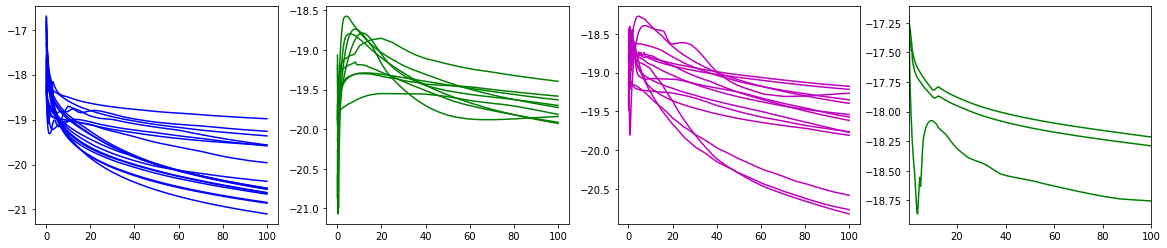

In [ ]:
plt.figure()
fig, axs = plt.subplots(1, len(clusters), figsize = [20,4])

for i in range(len(clusters[0])):
    axs[0].plot(df['elastic.energy'][0], clusters[0][i], 'b')

plt.xlim([1e-1, 1e2])

for i in range(len(clusters[1])):
    axs[1].plot(df['elastic.energy'][0], clusters[1][i], 'g')
plt.xlim([1e-1, 1e2])

for i in range(len(clusters[2])):
    axs[2].plot(df['elastic.energy'][0], clusters[2][i], 'm')

plt.xlim([1e-1, 1e2])
for i in range(len(clusters[3])):
    axs[3].plot(df['elastic.energy'][0], clusters[3][i], 'g')

plt.xlim([1e-1, 1e2])

# for i in range(len(clusters[4])):
#     axs[4].plot(df['elastic.energy'][0], clusters[4][i], 'm')

# plt.xlim([1e-1, 1e2])

# for i in range(len(clusters[5])):
#     axs[5].plot(df['elastic.energy'][0], clusters[5][i], 'b')


plt.xlim([1e-1, 1e2])
#plt.xscale('log')
#plt.yscale('log')

### Saving clusters to csv

In [ ]:
for i, cluster in enumerate(clusters):
    df_1 = pd.DataFrame(cluster)
    df_1.to_csv('cluster{}.csv'.format(i))

## Loading and visualizing clusters

In [ ]:
n_clusters = 4

In [ ]:
df_1 = pd.read_csv('/content/gdrive/Shareddrives/BMP/data/cluster{}.csv'.format(0)).drop(['Unnamed: 0'], axis = 1)
df_2 = pd.read_csv('/content/gdrive/Shareddrives/BMP/data/cluster{}.csv'.format(1)).drop(['Unnamed: 0'], axis = 1)
df_3 = pd.read_csv('/content/gdrive/Shareddrives/BMP/data/cluster{}.csv'.format(2)).drop(['Unnamed: 0'], axis = 1)
df_4 = pd.read_csv('/content/gdrive/Shareddrives/BMP/data/cluster{}.csv'.format(3)).drop(['Unnamed: 0'], axis = 1)

## Plotting

(0.1, 100.0)

<Figure size 432x288 with 0 Axes>

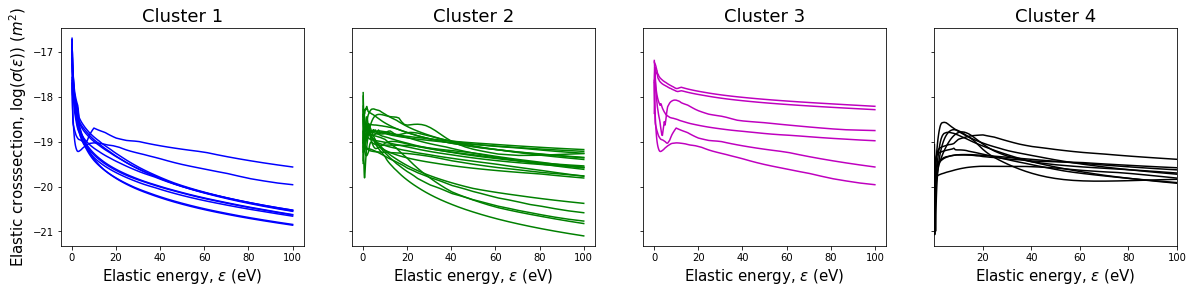

In [ ]:
plt.figure()
fig, axs = plt.subplots(1, 4, figsize = [20,4], sharey = True)

for i in range(len(df_1)):
    axs[0].plot(df['elastic.energy'][0],df_1.iloc[i], 'b')
axs[0].set_title('Cluster 1', fontsize = 18)
axs[0].set_xlabel('Elastic energy, $\epsilon$ (eV)', fontsize = 15)
axs[0].set_ylabel(r'Elastic crosssection, log($\sigma$($\epsilon$)) ($m^{2}$)', fontsize = 15)
plt.xlim([1e-1, 1e2])

for i in range(len(df_2)):
    axs[1].plot(df['elastic.energy'][0],df_2.iloc[i], 'g')
axs[1].set_title('Cluster 2', fontsize = 18)
axs[1].set_xlabel('Elastic energy, $\epsilon$ (eV)', fontsize = 15)
#axs[1].set_ylabel(r'Elastic crosssection, log($\sigma$($\epsilon$)) ($m^{2}$)', fontsize = 15)
plt.xlim([1e-1, 1e2])

for i in range(len(df_3)):
    axs[2].plot(df['elastic.energy'][0],df_3.iloc[i], 'm')
axs[2].set_title('Cluster 3', fontsize = 18)
axs[2].set_xlabel('Elastic energy, $\epsilon$ (eV)', fontsize = 15)
#axs[2].set_ylabel(r'Elastic crosssection, log($\sigma$($\epsilon$)) ($m^{2}$)', fontsize = 15)
plt.xlim([1e-1, 1e2])
for i in range(len(df_4)):
    axs[3].plot(df['elastic.energy'][0],df_4.iloc[i], 'k')
axs[3].set_title('Cluster 4', fontsize = 18)
axs[3].set_xlabel('Elastic energy, $\epsilon$ (eV)', fontsize = 15)
#axs[3].set_ylabel(r'Elastic crosssection, log($\sigma$($\epsilon$)) ($m^{2}$)', fontsize = 15)
plt.xlim([1e-1, 1e2])